# Perceptron Trainning

First we define the perceptron class with numpy

In [50]:
import numpy as np
class Perceptron:
    def __init__(self, eta = 0.1, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for i in range(0, self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        # When we have a single Xi vector
        if self.w_.shape[0] == X.shape[0] + 1:
            return np.dot(self.w_[1:], X) + self.w_[0]
        # When we have many rows of Xi vectors
        else:
            return np.sum(self.w_[1:] *X, axis=1) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) > 0.0, 1, -1)
    
    
        

Then we will import the iris data. 

In [4]:
import pandas as pd
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
            header=None)

iris.head()


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We will then select the 2 iris types we are interested in and preprocess the data

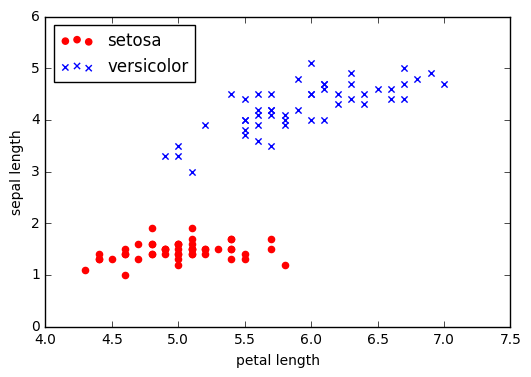

In [51]:
import matplotlib.pyplot as plt

# Select first 100 rows and the 5th column
y = iris.iloc[0:100, 4].values

# Map the two iris types to -1, 1
y = np.where(y == 'Iris-setosa', -1, 1)

# Grab the first 2 columns as X
X = iris.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('petal length')
plt.ylabel('sepal length')

plt.legend(loc='upper left')
plt.show()


now we train our perceptron with the irir data and plot errors

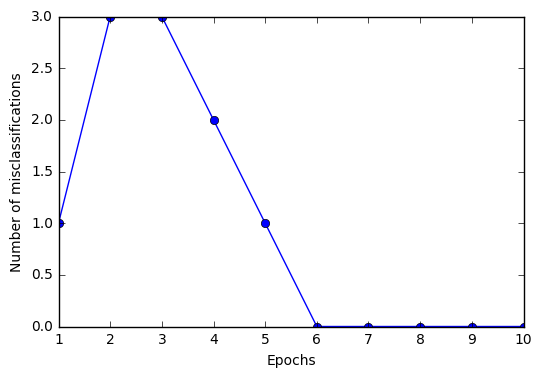

In [52]:
percep = Perceptron(eta=0.1, n_iter=10)
percep.fit(X, y)

plt.plot(range(1, len(percep.errors_) + 1), percep.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

plt.show()

In [ ]:
now lets paint the decision boundary

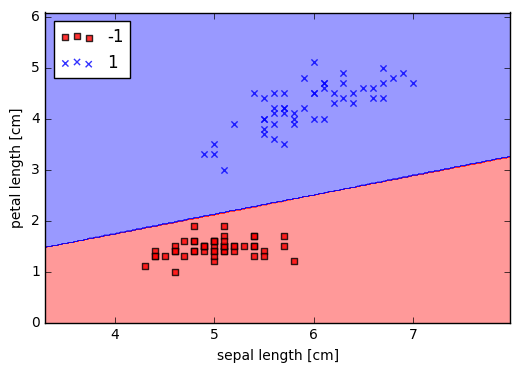

In [53]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    
    # get unique colors for color map
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # get the min max of our column vlaues
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # create meshgrid 
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                     np.arange(x2_min, x2_max, resolution))
    
    # unravel mesh to get a set of all x values to predict
    x_vals = np.array([xx1.ravel(), xx2.ravel()]).T
    
    # predict and reshape to fit graph
    Z = classifier.predict(x_vals)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                alpha=0.8, c=cmap(idx),
                marker=markers[idx], label=cl)    

plot_decision_regions(X, y, classifier=percep)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()    

Now let's create Adaline Perceptron 

In [59]:
class AdalineGD:
    def __init__(self, eta = 0.1, n_iter = 50):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(0, self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            
            # we update our weights to learning rate times x * errors of the entire batch
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # our cost function over the entire batch, its derivative is the learning rate
            # update above
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        # When we have a single Xi vector
        if self.w_.shape[0] == X.shape[0] + 1:
            return np.dot(self.w_[1:], X) + self.w_[0]
        # When we have many rows of Xi vectors
        else:
            return np.sum(self.w_[1:] *X, axis=1) + self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1) 


Now train and graph the convergence with two different learning rates

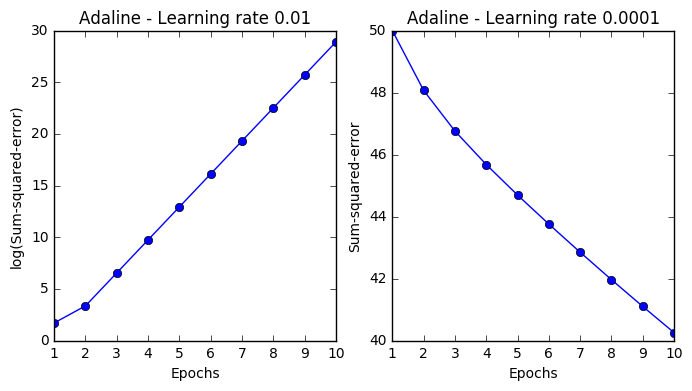

In [61]:
# subplot of 2 graphs in a row
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# learning rate of 0.01
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)

# graph of cost decrease
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')

ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

Fascinating, with a higher learning rate, our sum squared error is actually increasing!

Now, let's see what happens when we scale our features by normalizing it to one with std of 1 and mean of 0

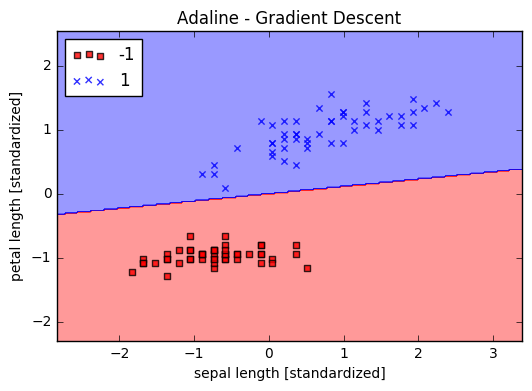

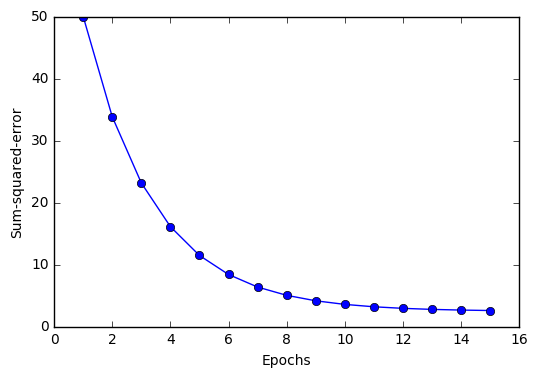

In [65]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

Note how quickly it converges, and how similar the graph is to our previous perceptron version, but SSE never hits zero!

On to a stochastic verion of our perceptron, using stochastic gradient descent

In [77]:
from numpy.random import seed

class AdalineSGD:
    def __init__(self, eta = 0.1, n_iter = 50, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
    
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            # Instead of using error, we will use average cost with every training instance
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self    
    
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def net_input(self, X):
        # When we have a single Xi vector
        if self.w_.shape[0] == X.shape[0] + 1:
            return np.dot(self.w_[1:], X) + self.w_[0]
        # When we have many rows of Xi vectors
        else:
            return np.sum(self.w_[1:] *X, axis=1) + self.w_[0]
    
    def _initialize_weights(self, m):
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        output = self.net_input(xi)
        error = (target - output)
        
        # we are updating our weights with only the current xi
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        
        # cost is still half square error
        cost = 0.5 * error**2
        return cost
    
    def _shuffle(self, X, y):    
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

And graph to see how quickly we converge with SGD with our standardized x values

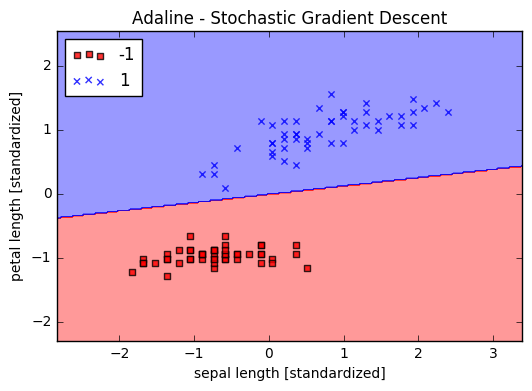

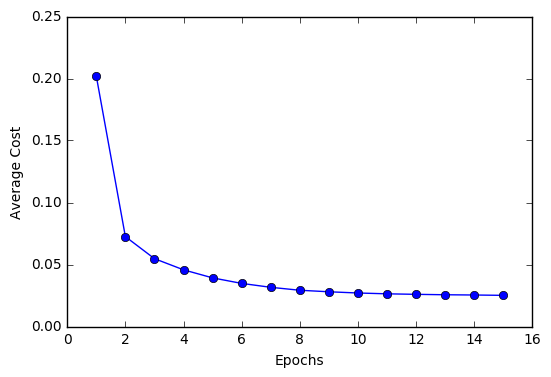

In [78]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()